<a href="https://colab.research.google.com/github/BHRA2004/Global-Temperature-Time-Series-Analysis/blob/main/Global_Temperature_Analysis_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Cleaning

In [ ]:
import pandas as pd

data = pd.read_csv('Global_temp.csv', skiprows=1)

# Clean the dataset
data_cleaned = data.replace('***', pd.NA).apply(pd.to_numeric, errors='coerce')

data_cleaned.to_csv('cleaned_data.csv', index=False)

Annual_Trends

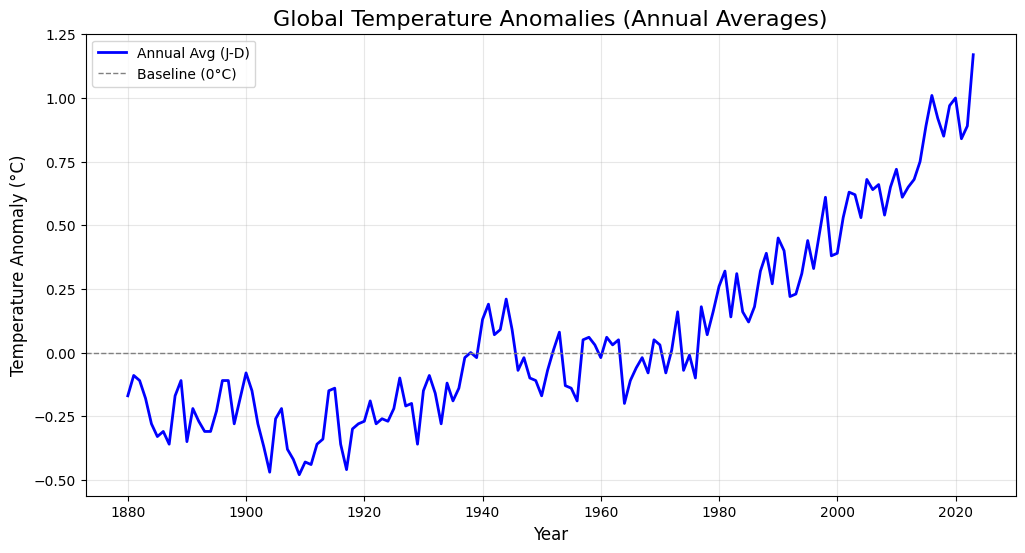

In [ ]:
import matplotlib.pyplot as plt


data = pd.read_csv('cleaned_data.csv')

# Plot Annual Averages (Year vs. J-D)
plt.figure(figsize=(12, 6))
plt.plot(data['Year'], data['J-D'], label='Annual Avg (J-D)', color='blue', linewidth=2)

# Add title and labels
plt.title('Global Temperature Anomalies (Annual Averages)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature Anomaly (°C)', fontsize=12)
plt.grid(alpha=0.3)
plt.axhline(0, color='gray', linestyle='--', linewidth=1, label='Baseline (0°C)')
plt.legend()
plt.show()


Monthly_Trends

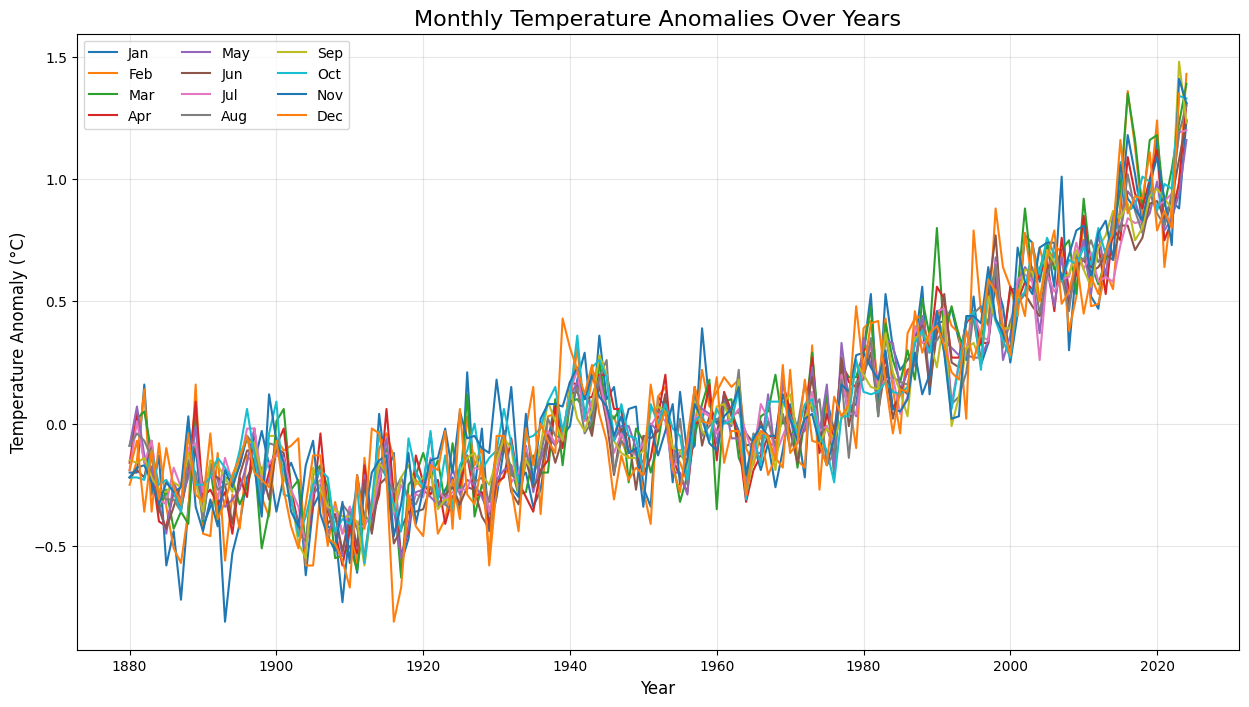

In [ ]:
import matplotlib.pyplot as plt

data = pd.read_csv('cleaned_data.csv')

# Plot each month's trend
plt.figure(figsize=(15, 8))
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

for month in months:
    plt.plot(data['Year'], data[month], label=month)

# Add title and labels
plt.title('Monthly Temperature Anomalies Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature Anomaly (°C)', fontsize=12)
plt.legend(ncol=3)
plt.grid(alpha=0.3)
plt.show()

Seasonal_Trends

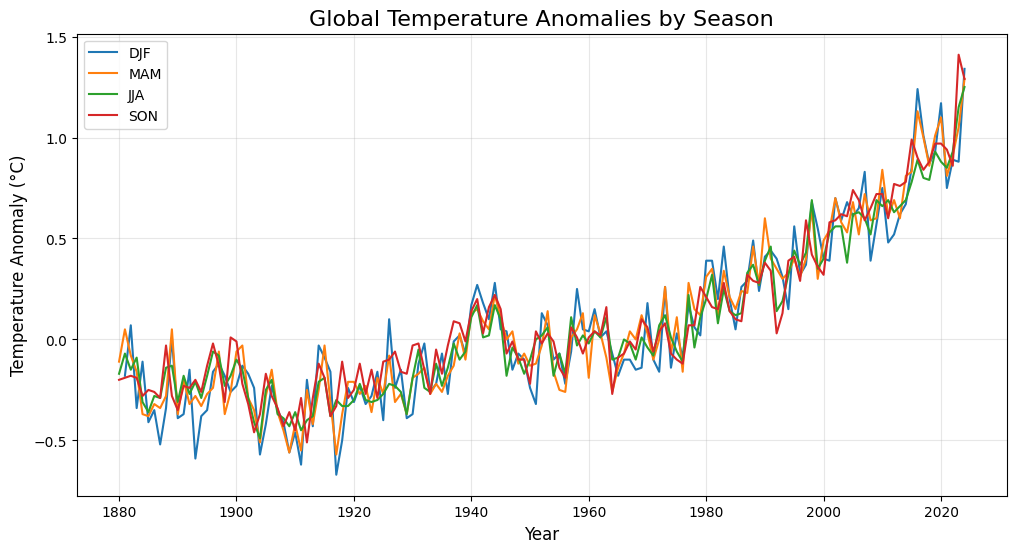

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('cleaned_data.csv')

# Plot seasonal averages over the years
plt.figure(figsize=(12, 6))
for season in ['DJF', 'MAM', 'JJA', 'SON']:
    plt.plot(data['Year'], data[season], label=season)

# Add title and labels
plt.title('Global Temperature Anomalies by Season', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature Anomaly (°C)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Statistical_Data

In [ ]:
import pandas as pd


data = pd.read_csv('cleaned_data.csv')

# Calculate summary statistics
statistics = data.describe()

# Print summary statistics
print(statistics)

              Year         Jan         Feb         Mar         Apr  \
count   145.000000  145.000000  145.000000  145.000000  145.000000   
mean   1952.000000    0.071172    0.079724    0.097517    0.071103   
std      42.001984    0.431889    0.438910    0.444089    0.406267   
min    1880.000000   -0.810000   -0.620000   -0.630000   -0.580000   
25%    1916.000000   -0.240000   -0.230000   -0.220000   -0.240000   
50%    1952.000000   -0.010000   -0.040000    0.020000   -0.020000   
75%    1988.000000    0.320000    0.390000    0.320000    0.290000   
max    2024.000000    1.240000    1.430000    1.390000    1.310000   

              May         Jun         Jul         Aug         Sep         Oct  \
count  145.000000  145.000000  145.000000  145.000000  145.000000  145.000000   
mean     0.060621    0.048759    0.072690    0.071586    0.076414    0.101931   
std      0.385602    0.386081    0.368405    0.384947    0.385945    0.391474   
min     -0.550000   -0.520000   -0.500000   -

Heatmap_Visualization

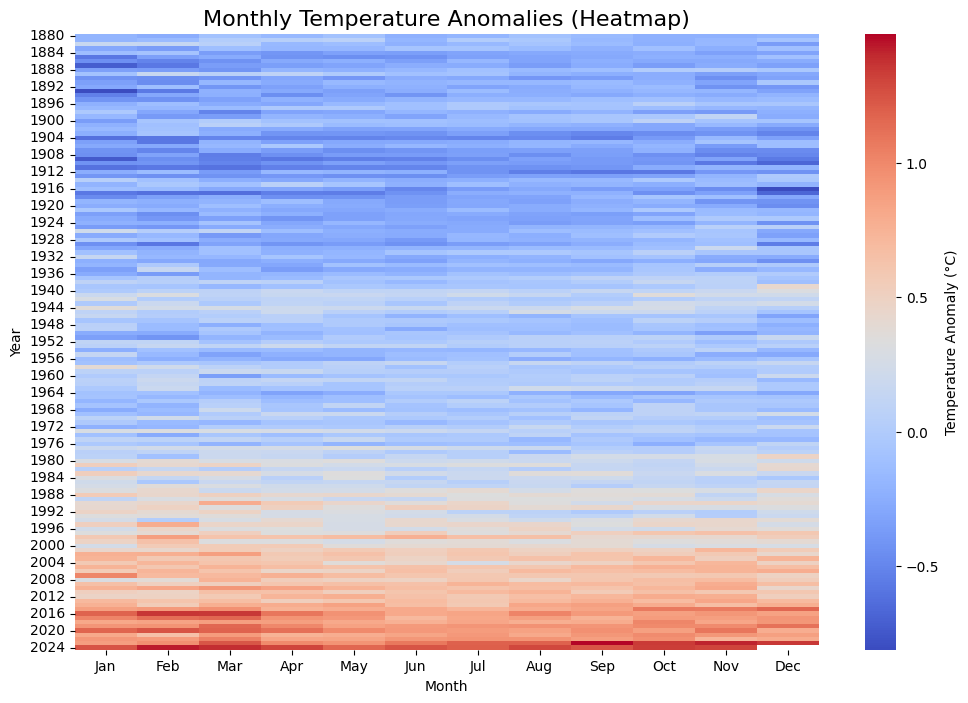

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


data = pd.read_csv('cleaned_data.csv')

# Reshape the data for heatmap (Years as rows, Months as columns)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_data = data[months].set_index(data['Year'])

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(monthly_data, cmap='coolwarm', cbar_kws={'label': 'Temperature Anomaly (°C)'})
plt.title('Monthly Temperature Anomalies (Heatmap)', fontsize=16)
plt.ylabel('Year')
plt.xlabel('Month')
plt.show()

Annual_Trends with a trendline

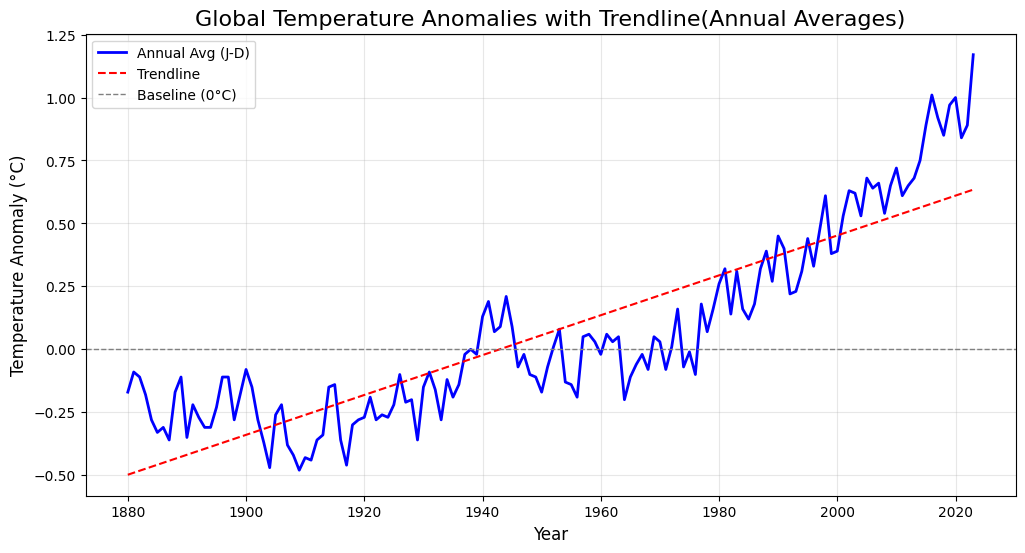

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('cleaned_data.csv')

#Handling Missing Values
data_cleaned = data.dropna(subset=['Year', 'J-D'])

# Example data (years and yearly temperature anomalies)
years = data_cleaned['Year'].to_numpy()  # Replace with your actual data
yearly_anomalies = data_cleaned['J-D'].to_numpy()  # Replace with your actual data

# Fit a linear trendline (degree=1 for a line)
coefficients = np.polyfit(years, yearly_anomalies, 1)
trendline = np.poly1d(coefficients)

# Plot Annual Averages (Year vs. J-D)
plt.figure(figsize=(12, 6))
plt.plot(data_cleaned['Year'], data_cleaned['J-D'], label='Annual Avg (J-D)', color='blue', linewidth=2)
plt.plot(years, trendline(years), label='Trendline', color='r', linestyle='--')

# Add title and labels
plt.title('Global Temperature Anomalies with Trendline(Annual Averages)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature Anomaly (°C)', fontsize=12)
plt.grid(alpha=0.3)
plt.axhline(0, color='gray', linestyle='--', linewidth=1, label='Baseline (0°C)')
plt.legend()
plt.show()

Rolling Average (10years)

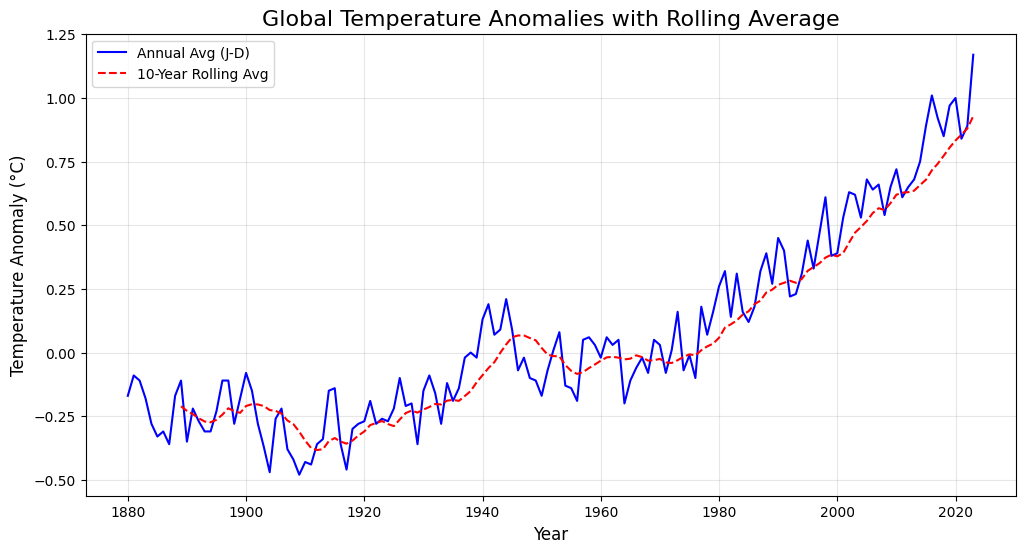

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('cleaned_data.csv')

# Add a rolling average column for annual trends
data['Rolling_Avg'] = data['J-D'].rolling(window=10).mean()

# Plot the rolling average alongside the annual trend
plt.figure(figsize=(12, 6))
plt.plot(data['Year'], data['J-D'], label='Annual Avg (J-D)', color='blue')
plt.plot(data['Year'], data['Rolling_Avg'], label='10-Year Rolling Avg', color='red', linestyle='--')

# Add title and labels
plt.title('Global Temperature Anomalies with Rolling Average', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature Anomaly (°C)', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Classic Time Series Decomposition

<ipython-input-19-c8c60ce721a9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Year'] = pd.to_datetime(data_cleaned['Year'], format='%Y')  # Convert Year to datetime


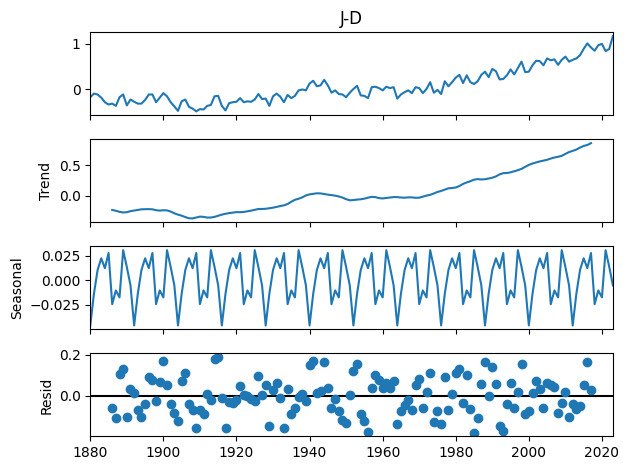

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load your time series data
data = pd.read_csv('cleaned_data.csv')

# Handle missing values (if any)
data_cleaned = data.dropna(subset=['Year','J-D']) # Applying changes to original dataframe data, instead of data_cleaned

data_cleaned['Year'] = pd.to_datetime(data_cleaned['Year'], format='%Y')  # Convert Year to datetime
data_cleaned.set_index('Year', inplace=True)  # Set Year as the index

# Perform decomposition (Additive model)
result = seasonal_decompose(data_cleaned['J-D'], model='additive', period=12)

# Plot the decomposition
result.plot()
plt.show()


STL Decomposition using (LOESS)

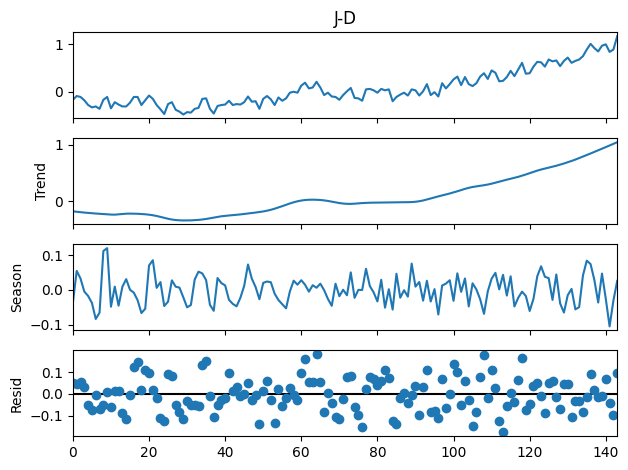

In [ ]:
from statsmodels.tsa.seasonal import STL

stl = STL(data_cleaned['J-D'], period=12)
res = stl.fit()
fig = res.plot()
plt.show()

To check if the data is White Noice or Random Walk

Visual Inspection
   -Plot the time series
   -Plot the autocorrelation function(ACF)
   1. Visual Inspection:

Plot the time series: Look for any obvious trends or patterns. White noise should appear random and without any discernible structure. A random walk might exhibit a drift or a wandering pattern.
Plot the autocorrelation function (ACF): White noise should have ACF values close to zero for all lags except lag 0. A random walk will have slowly decaying ACF values, indicating strong autocorrelation.

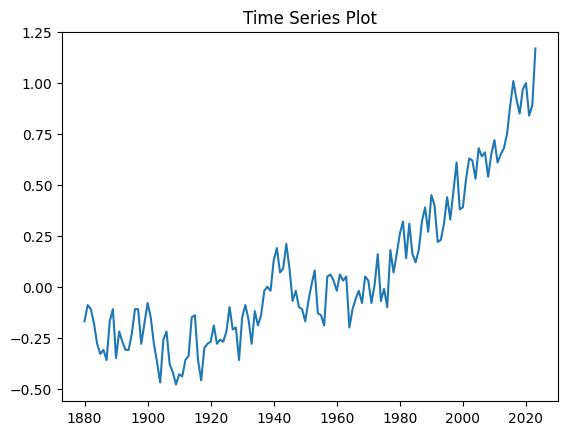

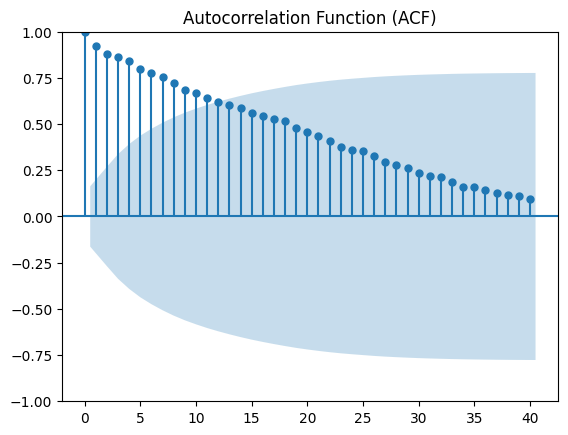

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import pandas as pd

data = pd.read_csv('cleaned_data.csv')

plt.plot(data['Year'], data['J-D'])  # Specify the x and y columns for plotting.
plt.title('Time Series Plot')
plt.show()

plot_acf(data['J-D'].dropna(), lags=40) # remove NA values before plotting ACF
plt.title('Autocorrelation Function (ACF)')
plt.show()

2. Statistical Tests:

Ljung-Box test: This test checks for autocorrelation in the data. If the p-value is less than the significance level (typically 0.05), we reject the null hypothesis of no autocorrelation, suggesting the data is not white noise.
Augmented Dickey-Fuller (ADF) test: This test checks for stationarity. If the p-value is greater than the significance level, we fail to reject the null hypothesis of non-stationarity, suggesting the data might be a random walk.


In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np

data = pd.read_csv('cleaned_data.csv') # Read data
ts_data = data['J-D'].dropna()  # Extract the 'J-D' column and remove NA values

# Ljung-Box test
lb_test_result = acorr_ljungbox(ts_data, lags=[10], return_df=True) # Applying test on cleaned 'J-D' column
print('Ljung-Box test p-values:', lb_test_result['lb_pvalue'])

# ADF test
adf_test_result = adfuller(ts_data) # Applying test on cleaned 'J-D' column
print('ADF test p-value:', adf_test_result[1])

Ljung-Box test p-values: 10    3.472450e-199
Name: lb_pvalue, dtype: float64
ADF test p-value: 0.9973983327661807


In [ ]:
3.472450e-199 < 0.05

True

As the p-value for the ADF Test is more than 0.05 so the Data is non-stationary thus suggesting random walk and the Ljung-Box text p-value is also less than 0.05 tus rejecting the null hypothesis of no autocorrelation, suggesting the data is not white noise

the data is random walk

Checking if the data is Stationary or not

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller


data = pd.read_csv('cleaned_data.csv')

# Handle missing values (if any)
data_cleaned = data.dropna(subset=['Year','J-D']) # Applying changes to original dataframe data, instead of data_cleaned

# ADF Test
def adf_test(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

adf_test(data_cleaned['J-D'])

ADF Statistic: 1.4670243373768275
p-value: 0.9973983327661807
Critical Values: {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}


As the Value of p is greater than 0.05 hence the data is not stationary

Using different Methods to Convert our data to Stationary

Diffenencing

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

data = pd.read_csv('cleaned_data.csv')
data_cleaned = data.dropna(subset=['Year','J-D'])

data_cleaned['J-D_diff'] = data_cleaned['J-D'].diff()
data_cleaned = data_cleaned.dropna()

adf_test(data_cleaned['J-D_diff'])
print(data_cleaned['J-D_diff'].describe())

ADF Statistic: -7.54473048649032
p-value: 3.306517187365435e-11
Critical Values: {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}
count    143.000000
mean       0.009371
std        0.112546
min       -0.250000
25%       -0.070000
50%        0.020000
75%        0.090000
max        0.280000
Name: J-D_diff, dtype: float64


<ipython-input-65-19bf49181362>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['J-D_diff'] = data_cleaned['J-D'].diff()


In [ ]:
print(3.306517187365435e-11 < 0.05)

True


Detrending

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt

data = pd.read_csv('cleaned_data.csv')
data_cleaned = data.dropna(subset=['Year','J-D'])

# Detrend the data
from sklearn.linear_model import LinearRegression

X = data_cleaned['Year'].values.reshape(-1, 1)  # Reshape for sklearn
y = data_cleaned['J-D'].values
model = LinearRegression()
model.fit(X, y)
trend = model.predict(X)

data_cleaned['J-D_detrended'] = data_cleaned['J-D'] - trend

# Perform the ADF test on the detrended data
adf_test(data_cleaned['J-D_detrended'])

ADF Statistic: -1.0785014947683806
p-value: 0.723568680396341
Critical Values: {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}


<ipython-input-23-10851a354bcf>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['J-D_detrended'] = data_cleaned['J-D'] - trend


In [ ]:
0.723568680396341 < 0.05

False

The data becomes stationary using differencing

Plot ACF and PACF on Differenced Data

<ipython-input-28-669079d27568>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['J-D_diff'] = data_cleaned['J-D'].diff()


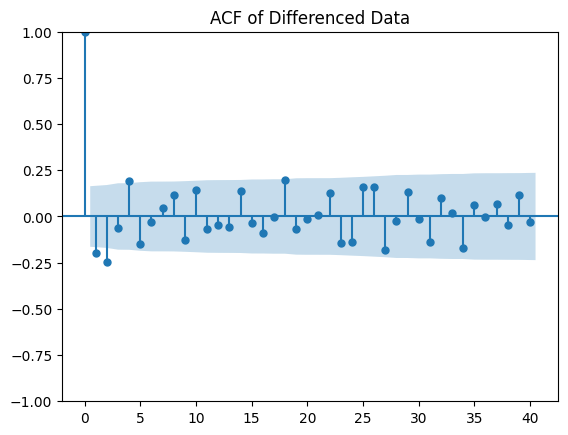

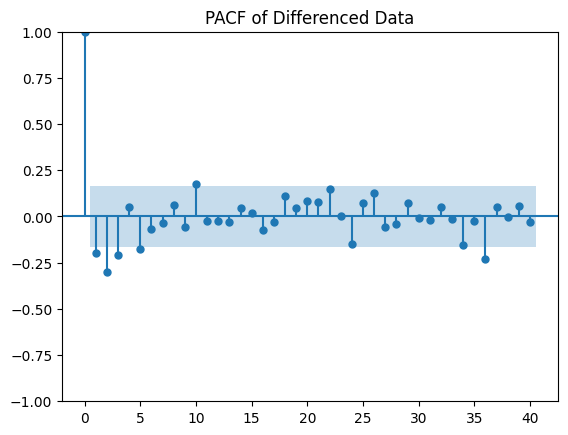

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the data
data = pd.read_csv('cleaned_data.csv')
data_cleaned = data.dropna(subset=['Year', 'J-D'])

# Calculate the difference and add it as a new column
data_cleaned['J-D_diff'] = data_cleaned['J-D'].diff()
data_cleaned = data_cleaned.dropna()  # Drop rows with NaN values introduced by differencing

# Now you can plot ACF and PACF using the updated data_cleaned DataFrame
plot_acf(data_cleaned['J-D_diff'].dropna(), lags=40)
plt.title('ACF of Differenced Data')
plt.show()

plot_pacf(data_cleaned['J-D_diff'].dropna(), lags=40)
plt.title('PACF of Differenced Data')
plt.show()

ACF Plot:

The ACF plot shows a significant spike at lag 1 and then a gradual decay.
This decay pattern suggests an autoregressive (AR) component in the data.
The gradual decay indicates that past values have a lingering effect on the current value.

PACF Plot:

The PACF plot shows a significant spike at lag 1 and then cuts off abruptly.
This sharp cutoff suggests a moving average (MA) component in the data.
The cutoff implies that only the immediately preceding value has a direct influence on the current value.

Model Suggestions:

Based on these observations, here are some potential models to consider:

ARIMA(p, d, q):

Since the data was differenced to make it stationary (d=1), an ARIMA model is appropriate.
p: The significant spike at lag 1 in the PACF suggests an AR(1) component.
q: The significant spike at lag 1 in the ACF suggests an MA(1) component.
Therefore, an ARIMA(1, 1, 1) model could be a good starting point.

Autoregressive (AR) Model:

The gradual decay in the ACF plot suggests an AR component.
An AR(1) model, focusing on the significant spike at lag 1, could be considered.

Moving Average (MA) Model:

The sharp cutoff in the PACF plot suggests an MA component.
An MA(1) model, based on the significant spike at lag 1, might be suitable.

AR Model

<ipython-input-72-f36c65b66a85>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Year'] = pd.to_datetime(data_cleaned['Year'], format='%Y')
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


RMSE: 0.11407780175586045


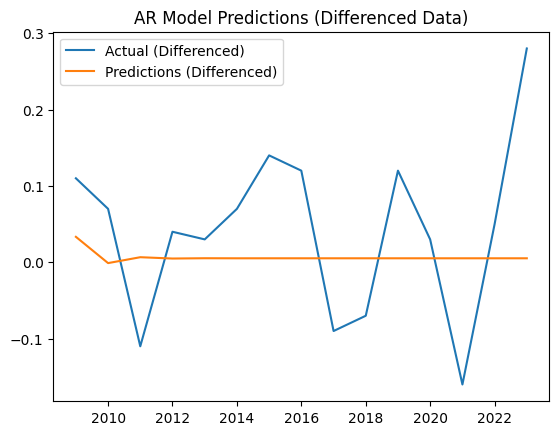

In [ ]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = pd.read_csv('cleaned_data.csv')
data_cleaned = data.dropna(subset=['Year','J-D'])

# Set 'Year' as the index and ensure it's a DateTimeIndex
data_cleaned['Year'] = pd.to_datetime(data_cleaned['Year'], format='%Y')
data_cleaned = data_cleaned.set_index('Year')

# Calculate the difference and add it as a new column
data_cleaned['J-D_diff'] = data_cleaned['J-D'].diff()
data_cleaned = data_cleaned.dropna()  # Drop rows with NaN values introduced by differencing

# Split the differenced data into train and test sets (e.g., 80% train, 20% test)
split_index = int(len(data_cleaned) * 0.9)
train_data = data_cleaned['J-D_diff'][:split_index]
test_data = data_cleaned['J-D_diff'][split_index:]

# Create and fit the AR model on the differenced data
model = AutoReg(train_data, lags=1)
model_fit = model.fit()

# Make predictions on the differenced data
predictions = model_fit.predict(start=len(train_data), end=len(data_cleaned)-1)

# Evaluate the model using RMSE
mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

# Visualize the results (differenced data)
plt.plot(test_data.index, test_data.values, label='Actual (Differenced)')
plt.plot(test_data.index, predictions, label='Predictions (Differenced)')
plt.legend()
plt.title('AR Model Predictions (Differenced Data)')
plt.show()

# To get predictions on the original scale, you need to integrate the predictions
# This involves adding the cumulative sum of the differenced predictions to the last observed value of the original series
# For example:
# original_series_last_value = data_cleaned['J-D'][split_index-1]  # Assuming split_index starts from 0
# original_series_predictions = np.r_[original_series_last_value, original_series_last_value + predictions.cumsum()]

MA Model

<ipython-input-71-ebed77fc5598>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Year'] = pd.to_datetime(data_cleaned['Year'], format='%Y')
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init

RMSE: 0.11239443659448776


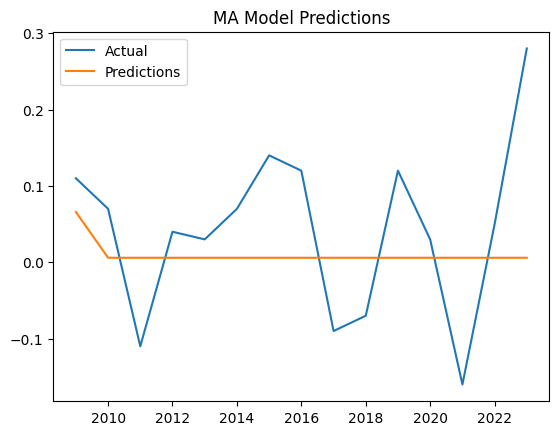

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = pd.read_csv('cleaned_data.csv')
data_cleaned = data.dropna(subset=['Year','J-D'])

# Set 'Year' as the index and ensure it's a DateTimeIndex
data_cleaned['Year'] = pd.to_datetime(data_cleaned['Year'], format='%Y')
data_cleaned = data_cleaned.set_index('Year')

# Calculate the difference and add it as a new column
data_cleaned['J-D_diff'] = data_cleaned['J-D'].diff()
data_cleaned = data_cleaned.dropna()  # Drop rows with NaN values introduced by differencing

# Split the differenced data into train and test sets (e.g., 80% train, 20% test)
split_index = int(len(data_cleaned) * 0.9)
train_data = data_cleaned['J-D_diff'][:split_index]
test_data = data_cleaned['J-D_diff'][split_index:]

# Create and fit the MA model
# The order of the MA model is specified by the 'q' parameter in ARIMA(p, d, q)
# For a pure MA model, set p=0 and d=0
model = ARIMA(train_data, order=(0, 0, 1))  # Adjust q as needed
model_fit = model.fit()

predictions = model_fit.predict(start=len(train_data), end=len(data_cleaned)-1)

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

plt.plot(test_data, label='Actual')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.title('MA Model Predictions')
plt.show()

ARIMA Model

<ipython-input-69-be3f2df3e879>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Year'] = pd.to_datetime(data_cleaned['Year'], format='%Y')
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init

RMSE: 0.1116298489458969


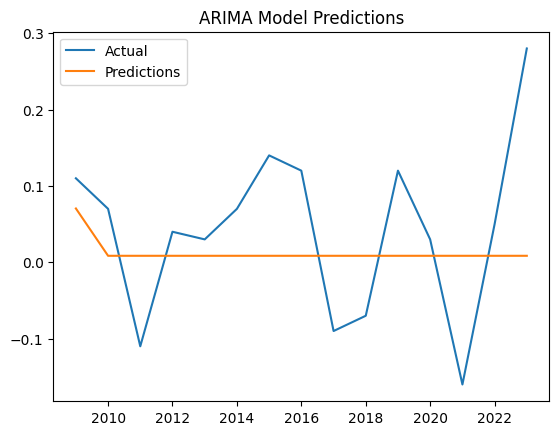

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = pd.read_csv('cleaned_data.csv')
data_cleaned = data.dropna(subset=['Year','J-D'])

# Set 'Year' as the index and ensure it's a DateTimeIndex
data_cleaned['Year'] = pd.to_datetime(data_cleaned['Year'], format='%Y')
data_cleaned = data_cleaned.set_index('Year')

# Calculate the difference and add it as a new column
data_cleaned['J-D_diff'] = data_cleaned['J-D'].diff()
data_cleaned = data_cleaned.dropna()  # Drop rows with NaN values introduced by differencing

split_index = int(len(data_cleaned) * 0.9)
train_data = data_cleaned['J-D_diff'][:split_index]
test_data = data_cleaned['J-D_diff'][split_index:]

model = ARIMA(train_data, order=(0, 1, 2))  # Adjust q as needed
model_fit = model.fit()

predictions = model_fit.predict(start=len(train_data), end=len(data_cleaned)-1)

mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)
print('RMSE:', rmse)

plt.plot(test_data, label='Actual')
plt.plot(predictions, label='Predictions')
plt.legend()
plt.title('ARIMA Model Predictions')
plt.show()

In [ ]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the parameter grid for p, d, q
p_values = range(0, 3)  # Example values for p
d_values = range(0, 2)  # Example values for d
q_values = range(0, 3)  # Example values for q

best_score = float(0.5)  # Initialize with a large value
best_order = (0, 0, 0)

# Perform grid search
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                model = ARIMA(train_data, order=(p, d, q))
                model_fit = model.fit()
                predictions = model_fit.predict(start=len(train_data), end=len(data_cleaned) - 1)
                mse = mean_squared_error(test_data, predictions)
                rmse = np.sqrt(mse)

                if rmse < best_score:
                    best_score = rmse
                    best_order = (p, d, q)

            except Exception as e:  # Handle potential errors during model fitting
                print(f"Error with order ({p}, {d}, {q}): {e}")
                continue

print(f"Best ARIMA order: {best_order}, with RMSE: {best_score}")

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be use

Best ARIMA order: (0, 1, 2), with RMSE: 0.1116298489458969


<ipython-input-66-cf57c12cf6d5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Year'] = pd.to_datetime(data_cleaned['Year'], format='%Y')
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn(

RMSE: 0.12061234059043574


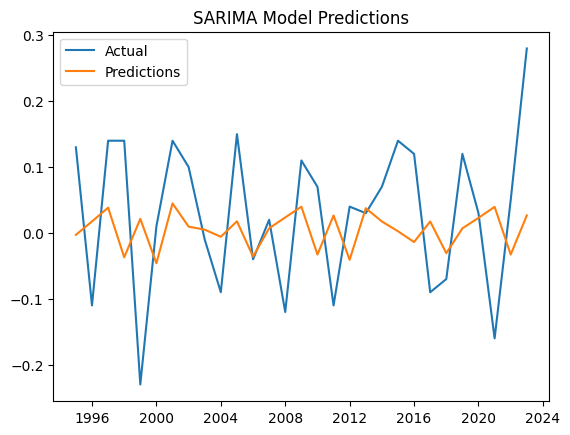

In [ ]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('cleaned_data.csv')
data_cleaned = data.dropna(subset=['Year', 'J-D'])  #Applying changes to original dataframe data, instead of data_cleaned
data_cleaned['Year'] = pd.to_datetime(data_cleaned['Year'], format='%Y')
data_cleaned = data_cleaned.set_index('Year')

# Calculate the difference and add it as a new column
data_cleaned['J-D_diff'] = data_cleaned['J-D'].diff()
data_cleaned = data_cleaned.dropna()  # Drop rows with NaN values introduced by differencing

# Split the differenced data into train and test sets (e.g., 80% train, 20% test)
split_index = int(len(data_cleaned) * 0.8)
train_data = data_cleaned['J-D_diff'][:split_index]
test_data = data_cleaned['J-D_diff'][split_index:]

# Define the model order (p, d, q) and seasonal order (P, D, Q, s)
# Example: SARIMA(1, 1, 1)x(1, 1, 1, 12)
order = (2, 0, 2)  # Non-seasonal order
seasonal_order = (0, 1, 2, 12)  # Seasonal order (assuming seasonality of 12 periods, like months)

# Create and fit the model
model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

predictions = model_fit.predict(start=len(train_data), end=len(data_cleaned) - 1)

rmse = np.sqrt(mean_squared_error(test_data, predictions))
print('RMSE:', rmse)

plt.plot(test_data.index, test_data.values, label='Actual')
plt.plot(test_data.index, predictions, label='Predictions')
plt.legend()
plt.title('SARIMA Model Predictions')
plt.show()

<ipython-input-94-427954df47c1>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Year'] = pd.to_datetime(data_cleaned['Year'], format='%Y')
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init

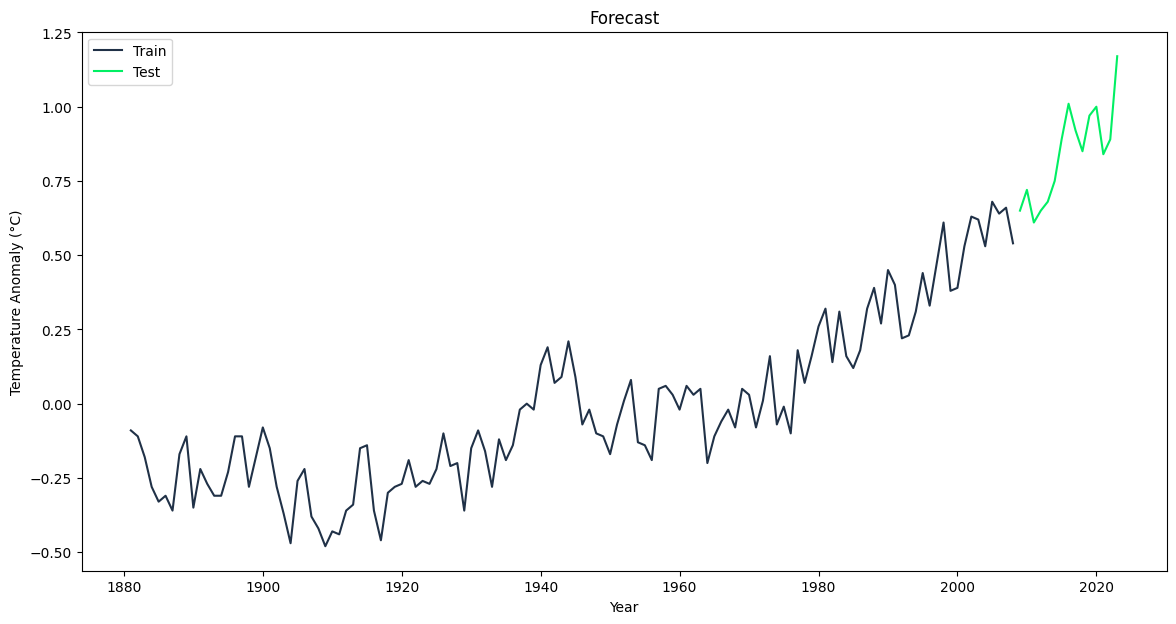

AIC: -198.4760410651717
BIC: -189.94347980579593
RMSE: 0.1116


In [94]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = pd.read_csv('cleaned_data.csv')
data_cleaned = data.dropna(subset=['Year','J-D'])

# Set 'Year' as the index and ensure it's a DateTimeIndex
data_cleaned['Year'] = pd.to_datetime(data_cleaned['Year'], format='%Y')
data_cleaned = data_cleaned.set_index('Year')

# Calculate the difference and add it as a new column
data_cleaned['J-D_diff'] = data_cleaned['J-D'].diff()
data_cleaned = data_cleaned.dropna()  # Drop rows with NaN values introduced by differencing

# Split data into train and test
train_size = int(len(data_cleaned) * 0.9)
train, test = data_cleaned.iloc[:train_size], data_cleaned.iloc[train_size:] # Selecting all columns for train and test

# Fit ARIMA model on the differenced data
model = ARIMA(train['J-D_diff'], order=(0,1,2)) # Using differenced data for the model
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test)) # Forecast for the length of the test set

# Create a new index for the forecast
# Starting from the last index of the test data and extending for the forecast horizon
forecast_index = pd.date_range(start=test.index[-1], periods=len(test) + 1, freq='Y')[1:]

# Plot the results with specified colors
plt.figure(figsize=(14,7))
plt.plot(train.index, train["J-D"], label='Train', color='#203147') # Accessing 'J-D' column in train DataFrame
plt.plot(test.index, test["J-D"], label='Test', color='#01ef63') # Accessing 'J-D' column in test DataFrame
#plt.plot(forecast_index, forecast, label='Forecast', color='orange') # Plotting the forecast using the new index
plt.title('Forecast')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.show()

print(f"AIC: {model_fit.aic}")
print(f"BIC: {model_fit.bic}")

# Calculate RMSE using the differenced data for evaluation
# Now, 'forecast' and 'test['J-D_diff']' have the same length
rmse = np.sqrt(mean_squared_error(test['J-D_diff'], forecast))
print(f"RMSE: {rmse:.4f}")

ADF Statistic: nan
p-value: nan


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                    J-D   No. Observations:                  145
Model:                 ARIMA(0, 1, 2)   Log Likelihood                 120.245
Date:                Tue, 14 Jan 2025   AIC                           -234.490
Time:                        17:17:47   BIC                           -225.581
Sample:                    01-01-1880   HQIC                          -230.870
                         - 01-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3211      0.087     -3.695      0.000      -0.491      -0.151
ma.L2         -0.2153      0.095     -2.274      0.023      -0.401      -0.030
sigma2         0.0109      0.002      6.909      0.0

<ipython-input-93-345b113e5659>:43: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.plot(pd.date_range(start=data.index[-1], periods=forecast_steps+1, freq='Y')[1:],


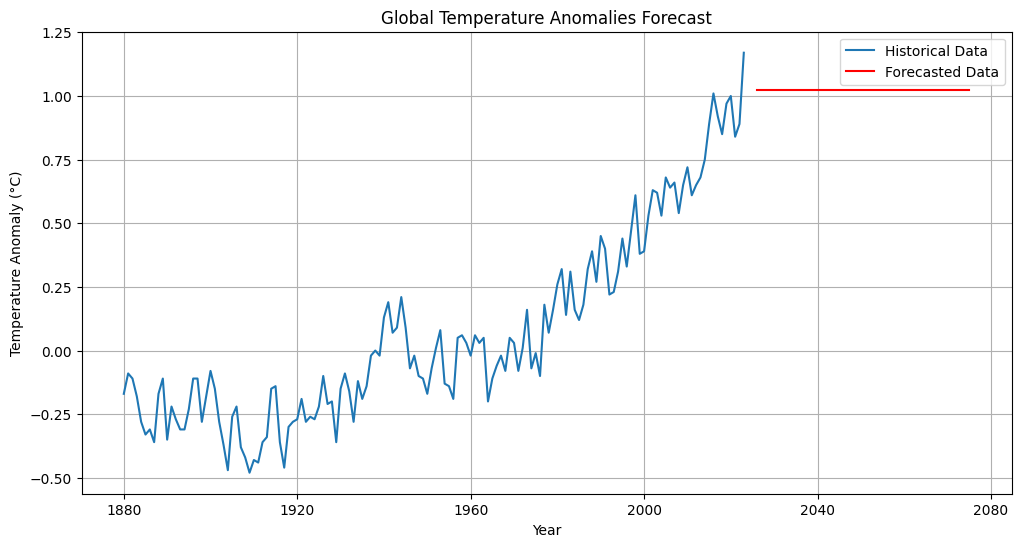

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import autocorrelation_plot

# Load data
data = pd.read_csv('cleaned_data.csv')
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data.set_index('Year', inplace=True)

# Check stationarity using ADF test
result = adfuller(data['J-D'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

if result[1] > 0.05:
    print("Data is not stationary. Applying differencing...")
    data_diff = data['J-D'].diff().dropna()

    # Check stationarity after differencing
    result_diff = adfuller(data_diff)
    print(f"ADF Statistic after differencing: {result_diff[0]}")
    print(f"p-value after differencing: {result_diff[1]}")

else:
    data_diff = data['J-D']

# Fit ARIMA model (manually chosen p, d, q or use auto_arima for automation)
model = ARIMA(data['J-D'], order=(0, 1, 2))
fitted_model = model.fit()

# Summary of the model
print(fitted_model.summary())

# Forecast future values
forecast_steps = 50  # Number of years to forecast
forecast = fitted_model.forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(data['J-D'], label='Historical Data')
plt.plot(pd.date_range(start=data.index[-1], periods=forecast_steps+1, freq='Y')[1:],
         forecast, label='Forecasted Data', color='red')
plt.title('Global Temperature Anomalies Forecast')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend()
plt.grid(True)
plt.show()
